#  T - 14 Análisis y Optimización de Redes de Tractografía Cerebral

Zaldívar Morales Emilia

La tractografía cerebral permite mapear las conexiones estructurales en el cerebro utilizando datos de imágenes de resonancia magnética de difusión (dMRI). Los alumnos deberán utilizar un dataset real de tractografía cerebral, construir la red neuronal correspondiente, analizar su estructura y robustez, y optimizar la red para mejorar su eficiencia y resiliencia.

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
from networkx.algorithms.community import greedy_modularity_communities

In [7]:
file_path = 'datos_tractografia.csv'
df = pd.read_csv(file_path)

def vector_to_symmetric_matrix(vector, size=160):
    matrix = np.zeros((size, size))
    indices = np.triu_indices(size, k=1)
    matrix[indices] = vector
    matrix = matrix + matrix.T
    np.fill_diagonal(matrix, 0)
    return matrix

matrices = [vector_to_symmetric_matrix(row) for index, row in df.iterrows()]

In [18]:
G1 = nx.from_numpy_array(matrices[0]) #matriz uno

centrality = nx.degree_centrality(G1)
cluster = nx.clustering(G1)
shortpath = nx.average_shortest_path_length(G1)

In [19]:
centrality

{0: 0.7547169811320755,
 1: 0.8364779874213837,
 2: 0.8113207547169812,
 3: 0.6415094339622642,
 4: 0.5157232704402516,
 5: 0.7484276729559749,
 6: 0.7861635220125787,
 7: 0.8113207547169812,
 8: 0.7610062893081762,
 9: 0.779874213836478,
 10: 0.6855345911949686,
 11: 0.7987421383647799,
 12: 0.628930817610063,
 13: 0.6981132075471699,
 14: 0.7484276729559749,
 15: 0.8490566037735849,
 16: 0.6477987421383649,
 17: 0.8867924528301887,
 18: 0.8930817610062893,
 19: 0.7044025157232705,
 20: 0.6729559748427674,
 21: 0.6855345911949686,
 22: 0.679245283018868,
 23: 0.779874213836478,
 24: 0.6918238993710693,
 25: 0.7484276729559749,
 26: 0.6666666666666667,
 27: 0.7987421383647799,
 28: 0.6226415094339623,
 29: 0.7924528301886793,
 30: 0.7169811320754718,
 31: 0.8113207547169812,
 32: 0.8553459119496856,
 33: 0.779874213836478,
 34: 0.779874213836478,
 35: 0.7484276729559749,
 36: 0.6163522012578617,
 37: 0.679245283018868,
 38: 0.8238993710691824,
 39: 0.7987421383647799,
 40: 0.7987421383

In [20]:
cluster

{0: 0.7413165266106443,
 1: 0.7330827067669173,
 2: 0.7387354651162791,
 3: 0.7493690545525141,
 4: 0.7389340560072267,
 5: 0.7249679532830081,
 6: 0.7214193548387097,
 7: 0.7237160852713178,
 8: 0.7392561983471074,
 9: 0.7420666142145292,
 10: 0.717465171593612,
 11: 0.7275340582427197,
 12: 0.7345454545454545,
 13: 0.7333333333333333,
 14: 0.7268195413758723,
 15: 0.7252625760088447,
 16: 0.7260612983057301,
 17: 0.7391084093211753,
 18: 0.7351912895814604,
 19: 0.7313384813384813,
 20: 0.7501322518074414,
 21: 0.7315664288141353,
 22: 0.7322602976808584,
 23: 0.7279045371098872,
 24: 0.7199332777314429,
 25: 0.7414898162654893,
 26: 0.7394429469901168,
 27: 0.7375328083989501,
 28: 0.7371675943104514,
 29: 0.7404444444444445,
 30: 0.7410340009315324,
 31: 0.7294089147286822,
 32: 0.7315904139433551,
 33: 0.7390506163126147,
 34: 0.7381327039076843,
 35: 0.74248682523857,
 36: 0.7494214180517568,
 37: 0.7377985462097612,
 38: 0.732824427480916,
 39: 0.7386576677915261,
 40: 0.7304086

In [21]:
shortpath

1.2672955974842768

In [22]:
metrics_df = pd.DataFrame({
    'Nodo': range(160),
    'Centralidad': list(centrality.values()),
    'Clustering': list(cluster.values())
})

metrics_df['Camino más corto promedio'] = shortpath

print(metrics_df.head())

   Nodo  Centralidad  Clustering  Camino más corto promedio
0     0     0.754717    0.741317                   1.267296
1     1     0.836478    0.733083                   1.267296
2     2     0.811321    0.738735                   1.267296
3     3     0.641509    0.749369                   1.267296
4     4     0.515723    0.738934                   1.267296


In [23]:
def remove_nodo(G, node):
    G.remove_node(node)
    connected = nx.is_connected(G)
    cc_size = len(max(nx.connected_components(G), key=len))
    return connected, cc_size

In [24]:
G = nx.from_numpy_array(matrices[0])

nodes_to_remove = [0, 1, 2, 3, 4]

results = []
for node in nodes_to_remove:
    connected, cc_size = remove_nodo(G, node)
    results.append((node, connected, cc_size))

robustness_df = pd.DataFrame(results, columns=['Nodo', 'Conectado', 'coomponente más largo'])

print(robustness_df)

   Nodo  Conectado  coomponente más largo
0     0       True                    159
1     1       True                    158
2     2       True                    157
3     3       True                    156
4     4       True                    155


In [25]:
def añadir_enlaces_redundantes(G, num_enlaces=5):
    enlaces_añadidos = 0
    while enlaces_añadidos < num_enlaces:
        nodo1, nodo2 = np.random.choice(G.nodes(), 2, replace=False)
        if not G.has_edge(nodo1, nodo2):
            G.add_edge(nodo1, nodo2)
            enlaces_añadidos += 1
    return G

G_original = nx.from_numpy_array(matrices[0])

G_optimizado = G_original.copy()

G_optimizado = añadir_enlaces_redundantes(G_optimizado, num_enlaces=10)

In [30]:
centralidad_grado_original = nx.degree_centrality(G_original)
coeficiente_agrupamiento_original = nx.clustering(G_original)
longitud_promedio_camino_original = nx.average_shortest_path_length(G_original)

centralidad_grado_optimizada = nx.degree_centrality(G_optimizado)
coeficiente_agrupamiento_optimizada = nx.clustering(G_optimizado)
longitud_promedio_camino_optimizada = nx.average_shortest_path_length(G_optimizado)

comparacion_df = pd.DataFrame({
    'Métrica': ['Centralidad de Grado', 'Coeficiente de Agrupamiento', 'Longitud Promedio del Camino'],
    'Original': [np.mean(list(centralidad_grado_original.values())), np.mean(list(coeficiente_agrupamiento_original.values())), longitud_promedio_camino_original],
    'Optimizada': [np.mean(list(centralidad_grado_optimizada.values())), np.mean(list(coeficiente_agrupamiento_optimizada.values())), longitud_promedio_camino_optimizada]
})

print(comparacion_df)

                        Métrica  Original  Optimizada
0          Centralidad de Grado  0.732704    0.733491
1   Coeficiente de Agrupamiento  0.746263    0.746853
2  Longitud Promedio del Camino  1.267296    1.266509


In [32]:
def redistribuir_carga(G):
    centralidad_carga = nx.load_centrality(G)
    nodos = sorted(G.nodes(), key=lambda x: centralidad_carga[x], reverse=True)
    for i in range(len(nodos) - 1):
        if not G.has_edge(nodos[i], nodos[i+1]):
            G.add_edge(nodos[i], nodos[i+1])
    return G

G_optimizado_carga = redistribuir_carga(G_optimizado)

In [33]:
centralidad_grado_optimizada_carga = nx.degree_centrality(G_optimizado_carga)
coeficiente_agrupamiento_optimizada_carga = nx.clustering(G_optimizado_carga)
longitud_promedio_camino_optimizada_carga = nx.average_shortest_path_length(G_optimizado_carga)

comparacion_carga_df = pd.DataFrame({
    'Métrica': ['Centralidad de Grado', 'Coeficiente de Agrupamiento', 'Longitud Promedio del Camino'],
    'Original': [np.mean(list(centralidad_grado_original.values())), np.mean(list(coeficiente_agrupamiento_original.values())), longitud_promedio_camino_original],
    'Optimizada': [np.mean(list(centralidad_grado_optimizada.values())), np.mean(list(coeficiente_agrupamiento_optimizada.values())), longitud_promedio_camino_optimizada],
    'Optimizada con Redistribución de Carga': [np.mean(list(centralidad_grado_optimizada_carga.values())), np.mean(list(coeficiente_agrupamiento_optimizada_carga.values())), longitud_promedio_camino_optimizada_carga]
})

print(comparacion_carga_df)

                        Métrica  Original  Optimizada  \
0          Centralidad de Grado  0.732704    0.733491   
1   Coeficiente de Agrupamiento  0.746263    0.746853   
2  Longitud Promedio del Camino  1.267296    1.266509   

   Optimizada con Redistribución de Carga  
0                                0.740094  
1                                0.752395  
2                                1.259906  


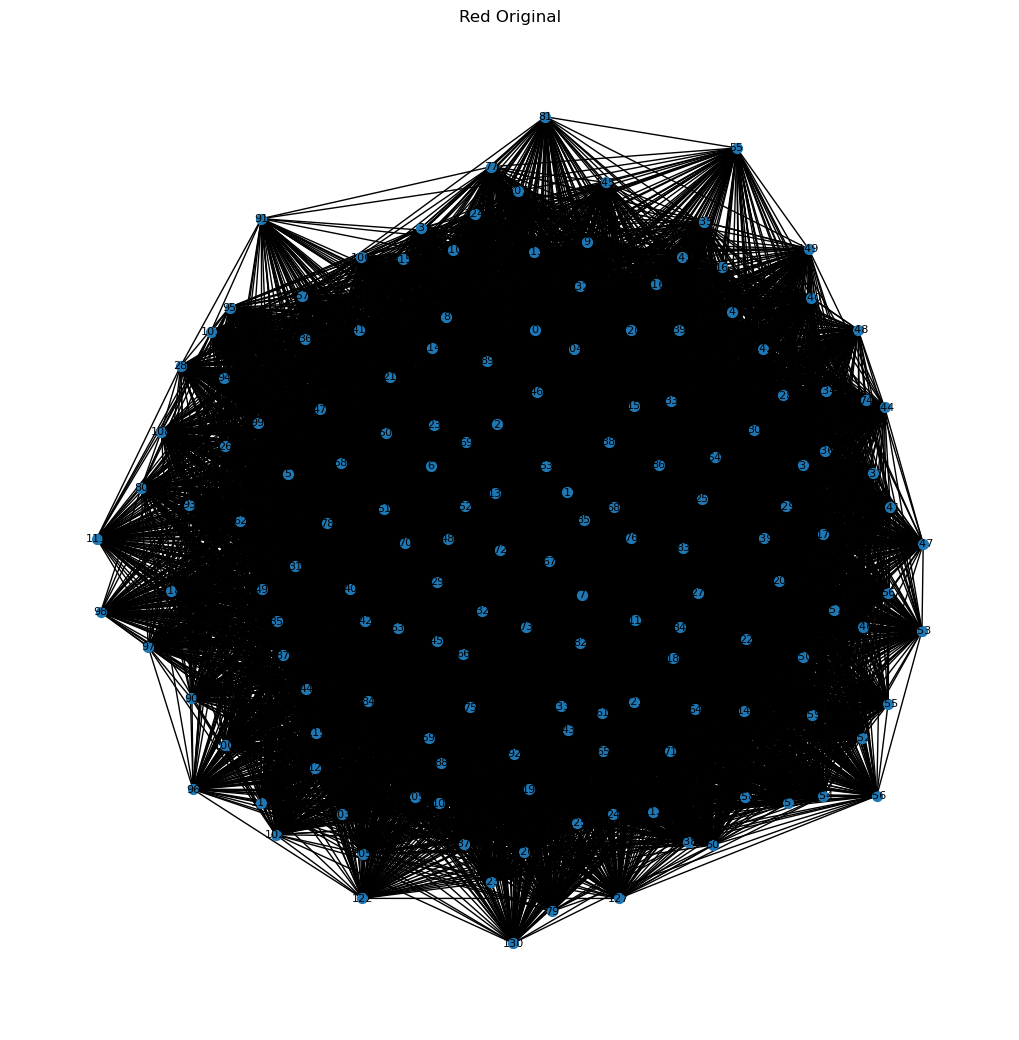

In [36]:
plt.figure(figsize=(10, 10))
nx.draw(G1, with_labels=True, node_size=50, font_size=8)
plt.title('Red Original')
plt.show()

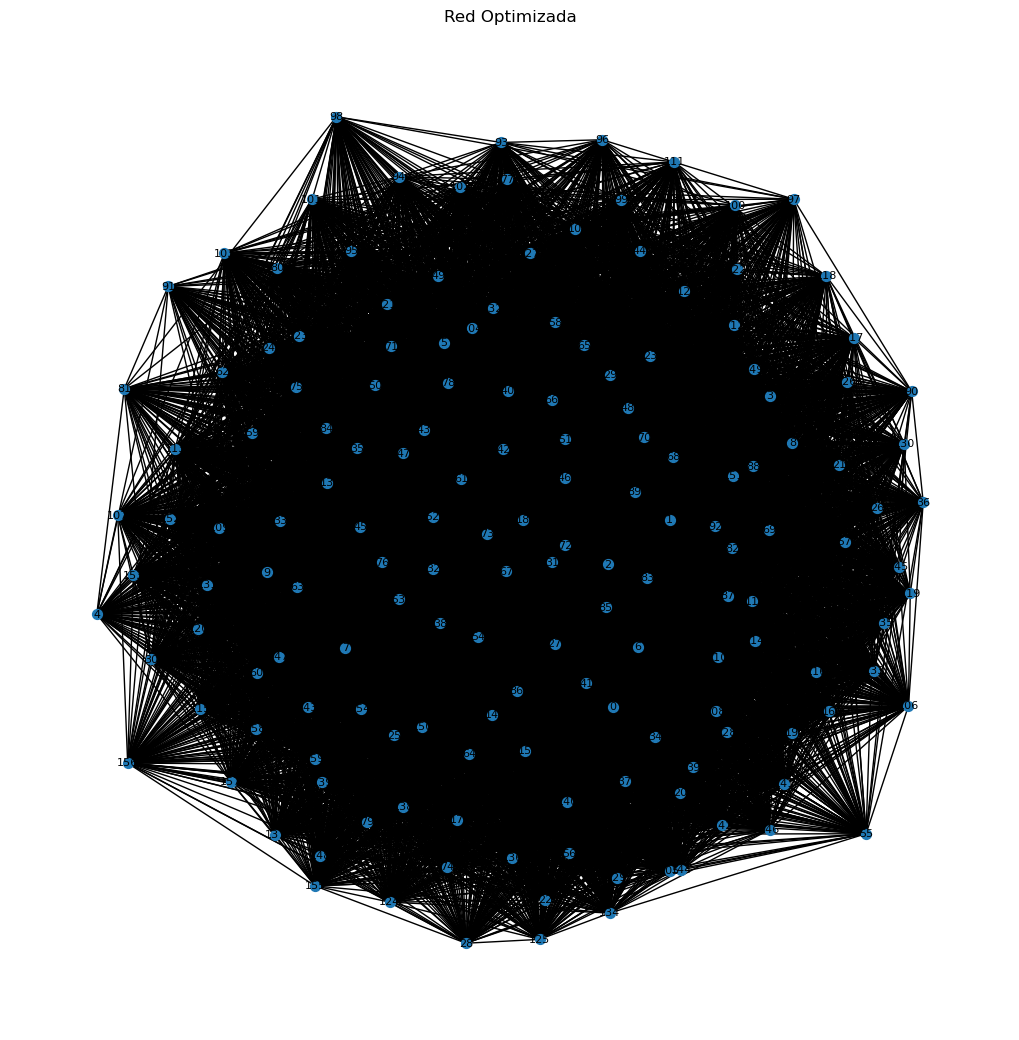

In [34]:
plt.figure(figsize=(10, 10))
nx.draw(G_optimizado, with_labels=True, node_size=50, font_size=8)
plt.title('Red Optimizada')
plt.show()

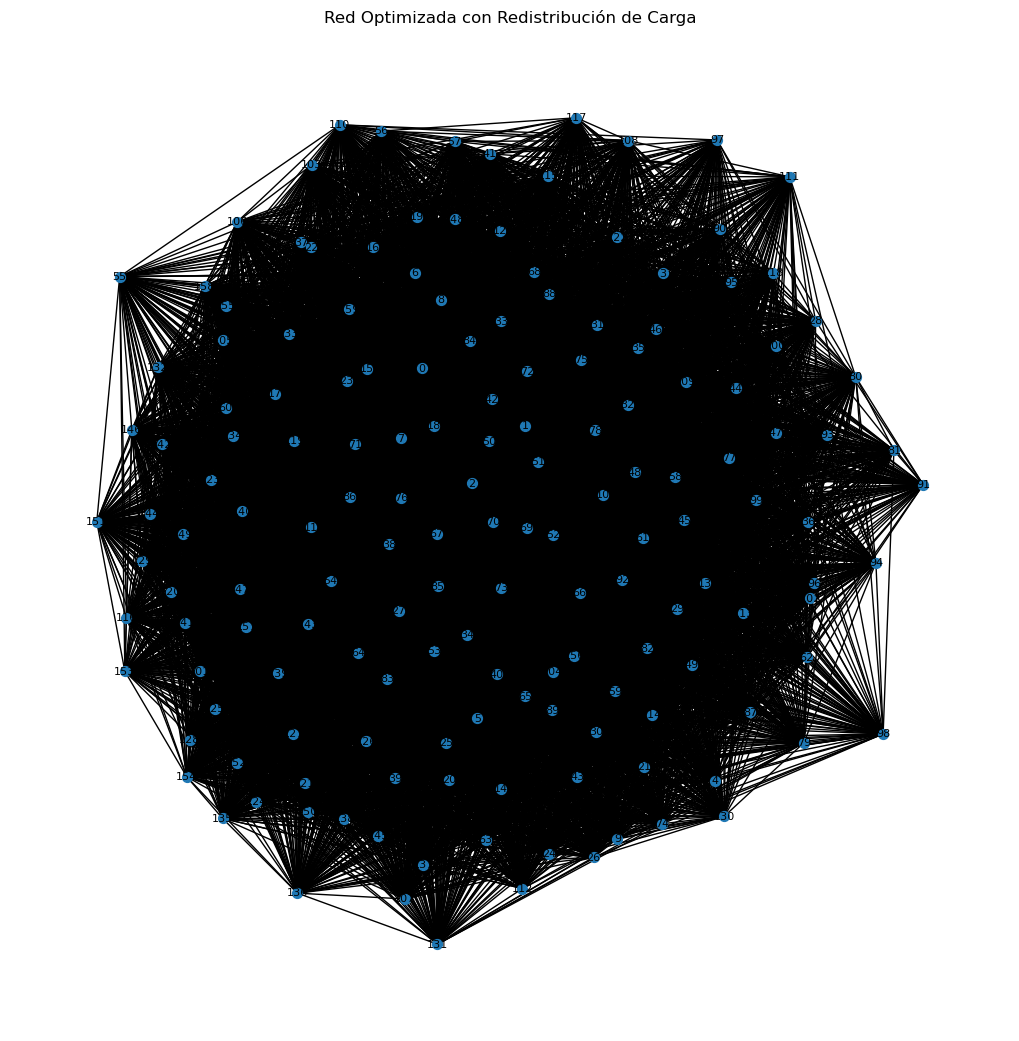

In [35]:
plt.figure(figsize=(10, 10))
nx.draw(G_optimizado_carga, with_labels=True, node_size=50, font_size=8)
plt.title('Red Optimizada con Redistribución de Carga')
plt.show()